# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 150%; text-align: center; border-radius : 25px 25px;"> Predicting Price of Diamonds </p>

<p style = "text-align: center; font-family : newtimeroman; font-size: 125%;">
<strong> Justin Cheigh <br>
<a href = "https://www.linkedin.com/in/justin-cheigh/"> LinkedIn </a> <br>
jhc5@williams.edu  <br>
<strong> Completed Dec. 20th, 2022 </p>

<p style = "text-align: justify;"> 
In this notebook we provide analysis of a common diamonds dataset, found on <a href="https://www.kaggle.com/datasets/shivam2503/diamonds"> kaggle.</a> Our goal is to utilize basic supervised learning models to predict the price of the diamonds using the given features. We will perform exploratory data analysis with NumPy, pandas, matplotlib, and seaborn before using scikit-learn to perform various regression models. This really is just an introductory project to get more familiar with some basic tools; much of this project was inspired by Hasib Al Muzdadid's analysis of the same dataset (see <a href = "https://www.kaggle.com/code/hasibalmuzdadid/diamond-price-analysis-prediction"> here</a>). Below is a table of contents: </p> 

<a id='top'></a>

# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 25px 25px;"> Table of Contents </p>

|No  | Contents |No  | Contents  |
|:---| :---     |:---| :----     |
|1   | [<font color="#1c1c1c"> Importing Libraries</font>](#1)                   |8   | [<font color="#1c1c1c"> Diamond's Weight (Carat) </font>](#8)                   |
|2   | [<font color="#1c1c1c"> Dataset Description</font>](#2)                         |9   | [<font color="#1c1c1c"> Diamond's Depth Percentage </font>](#9)     
|3   | [<font color="#1c1c1c"> Data Summary and Information</font>](#3)                     |10   | [<font color="#1c1c1c"> Diamond's Table</font>](#10)   |  
|4   | [<font color="#1c1c1c"> Diamond's Price</font>](#4)                       |11  | [<font color="#1c1c1c"> Detecting Outliers</font>](#11)|   
|5   | [<font color="#1c1c1c"> Diamond's Cut</font>](#5)      |12  | [<font color="#1c1c1c"> Correlation Map</font>](#12)   |         
|6   | [<font color="#1c1c1c"> Diamond's Color</font>](#6)              |13  | [<font color="#1c1c1c"> Model Creation </font>](#13)    |   
|7   | [<font color="#1c1c1c"> Diamond's Clarity</font>](#7)           |14  | [<font color="#1c1c1c"> Final Model</font>](#14)  |     

<a id='1'></a>

# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 25px 25px;"> Importing Libraries </p>

In [1]:
#data analysis libraries
import numpy as np
import pandas as pd

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
 
#train test split
from sklearn.model_selection import train_test_split 

#regression error metrics
from sklearn import metrics

#scaler/label encoder
from sklearn.preprocessing import StandardScaler, LabelEncoder

#cross validation w/ grid search 
from sklearn.model_selection import GridSearchCV

#pipeline 
from sklearn.pipeline import Pipeline

#polynomial converter for poly-regression
from sklearn.preprocessing import PolynomialFeatures

#regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id='2'></a>
# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 25px 25px;"> Dataset Description </p>

In [27]:
#load in dataset without index column
df = pd.read_csv("diamonds.csv", index_col = 0)

<p style = "text-align: justify;"> This dataset contains the price and other attributes of ~54,000 diamonds. Below is a description of the various other feautures in the dataset. </p> 

* **price** price in US dollars 
* **carat** weight of diamond
* **cut** quality of cut (Fair, Good, Very Good, Premium, Ideal)
* **color** daimond color, from J (worst) to D (best)
* **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **x** length (mm) 
* **y** width (mm)
* **z** depth (mm)
* **depth** total depth percentage $= \frac{2z}{x + y}$
* **table** width of top of diamond relative to widest point

<a id='3'></a>
# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 25px 25px;"> Data Summary and Information </p>

In [28]:
print(f"Dataset Shape {df.shape}")
print(f"\nDataset Head:")
df.head().style.set_properties(**{"background-color" : "#FFF0F5",
                                  "border" : "1.5px solid black"})

Dataset Shape (53940, 10)

Dataset Head:


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.230000,Ideal,E,SI2,61.500000,55.000000,326,3.950000,3.980000,2.430000
2,0.210000,Premium,E,SI1,59.800000,61.000000,326,3.890000,3.840000,2.310000
3,0.230000,Good,E,VS1,56.900000,65.000000,327,4.050000,4.070000,2.310000
4,0.290000,Premium,I,VS2,62.400000,58.000000,334,4.200000,4.230000,2.630000
5,0.310000,Good,J,SI2,63.300000,58.000000,335,4.340000,4.350000,2.750000


In [30]:
print(f"Dataset Information:\n")
print(df.info())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB
None


In [31]:
print(f"Summary of Quantitative Variables:")
df.describe().style.set_properties(**{"background-color" : "#FFF0F5",
                                  "border" : "1.5px solid black"})

Summary of Quantitative Variables:


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [32]:
print(f"Summary of Categorical Variables:")
df.describe(include = object).style.set_properties(**{"background-color" : "#FFF0F5",
                                  "border" : "1.5px solid black"})

Summary of Categorical Variables:


,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [33]:
print(f"Checking for Null Values:")
df.isna().sum().to_frame().transpose().style.set_properties(**{"background-color" : "#FFF0F5",
                                  "border" : "1.5px solid black"})

Checking for Null Values:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0,0,0,0,0,0,0,0,0


Through this basic analysis we learn a few things. There are $3$ categorical variables (cut, color, clarity), whereas the rest are quantitative. There are no null values, so luckily we don't need to worry about that. 

<a id='4'></a>

# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 25px 25px;"> Diamond's Price </p>

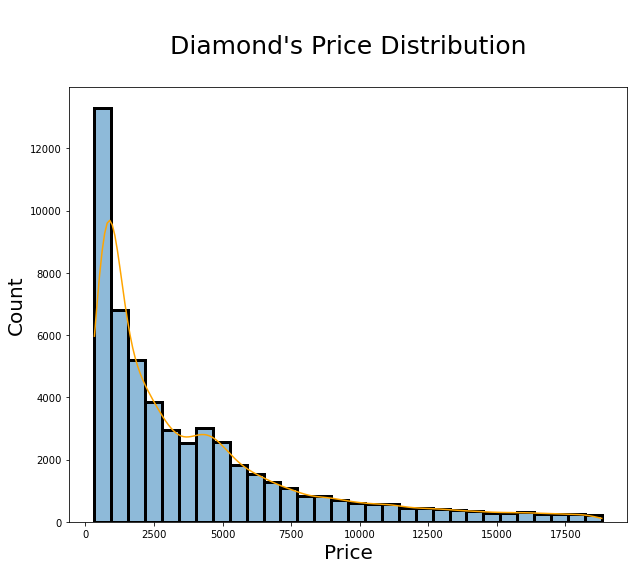

In [34]:
plt.figure(figsize = (10,8))
p = sns.histplot(x = "price", data = df, bins = 30, kde = True,
                fill = True, edgecolor = "black", linewidth = 3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nDiamond's Price Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Price",fontsize=20)
plt.show()

Notice that the distribution of prices is right skewed, indicating that the majority of diamonds fall in the $\$300-\$2500$ dollar range. There are also rarer diamonds that can cost up to $\$18000$.

<a id='5'></a>

# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 25px 25px;"> Diamond's Cut </p>

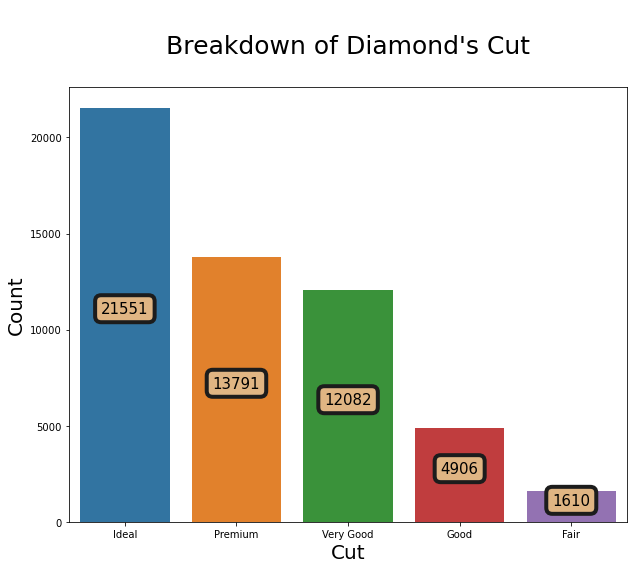

In [35]:
plt.figure(figsize = (10,8)) #create figure
p = sns.countplot(x = "cut", data = df, order= df["cut"].value_counts().index) #create countplot
p.axes.set_title("\nBreakdown of Diamond's Cut\n", fontsize = 25)
p.axes.set_ylabel("Count",fontsize = 20)
p.axes.set_xlabel("Cut", fontsize = 20) #add x, y, title 

for container in p.containers: #add counts
    p.bar_label(container, label_type = "center", padding = 6, size = 15, color = "black",
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})
plt.show()

The most common cut category for a diamond is Ideal, followed in order by the level of cut (i.e. premium, very good, good, fair). We now will look at the relationship between cut and price.

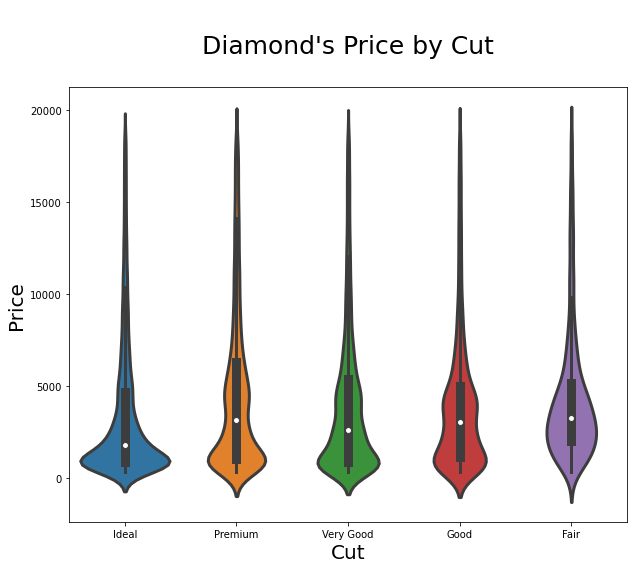

In [36]:
plt.figure(figsize = (10, 8))
p = sns.violinplot(x = "cut", y = "price", data = df, order = df["cut"].value_counts().index,
                 linewidth = 3, edgecolor = "black")
p.axes.set_title("\nDiamond's Price by Cut\n", fontsize = 25)
p.axes.set_xlabel("Cut", fontsize = 20)
p.axes.set_ylabel("Price", fontsize = 20)
plt.show()

In [37]:
df.groupby("cut").describe()["price"].style.set_properties(**{"background-color" : "#FFF0F5",
                            "border" : "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Fair,1610.000000,4358.757764,3560.386612,337.000000,2050.250000,3282.000000,5205.500000,18574.000000
Good,4906.000000,3928.864452,3681.589584,327.000000,1145.000000,3050.500000,5028.000000,18788.000000
Ideal,21551.000000,3457.541970,3808.401172,326.000000,878.000000,1810.000000,4678.500000,18806.000000
Premium,13791.000000,4584.257704,4349.204961,326.000000,1046.000000,3185.000000,6296.000000,18823.000000
Very Good,12082.000000,3981.759891,3935.862161,336.000000,912.000000,2648.000000,5372.750000,18818.000000


Below are rough IQR's for price by cut:
* **Ideal** diamonds tend to cost around $\$850-\$4700$ 
* **Premium** diamonds tend to cost around $\$1000-\$6300$ 
* **Very Good** diamonds tend to cost around $\$910-\$5400$ 
* **Good** diamonds tend to cost around $\$1100-\$5050$ 
* **Fair** diamonds tend to cost around $\$2050-\$5250$

<a id='6'></a>

# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 25px 25px;"> Diamond's Color </p>

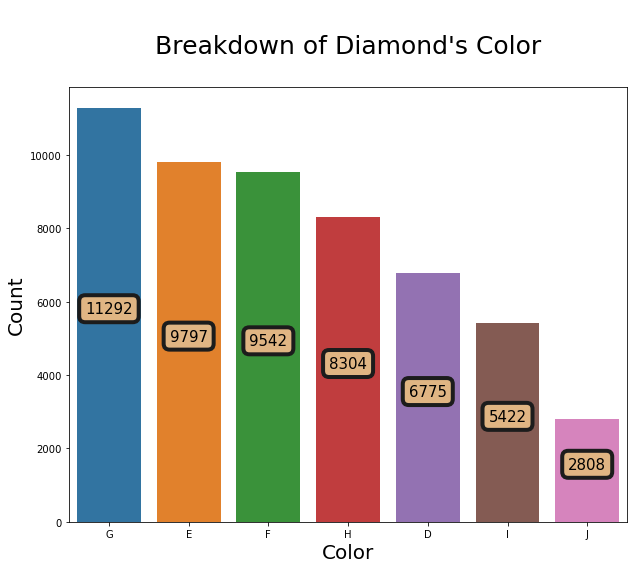

In [38]:
plt.figure(figsize = (10,8)) #create figure
p = sns.countplot(x = "color", data = df, order= df["color"].value_counts().index) #create countplot
p.axes.set_title("\nBreakdown of Diamond's Color\n", fontsize = 25)
p.axes.set_ylabel("Count",fontsize = 20)
p.axes.set_xlabel("Color", fontsize = 20) #add x, y, title 

for container in p.containers: #add counts
    p.bar_label(container, label_type = "center", padding = 6, size = 15, color = "black",
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})
plt.show()

The most common color category is $G$, followed by $E, F$. Recall $D$ is the best color, and $J$ is the worst color. Both of these categories aren't the most common, with $J$ being the rarest category. 

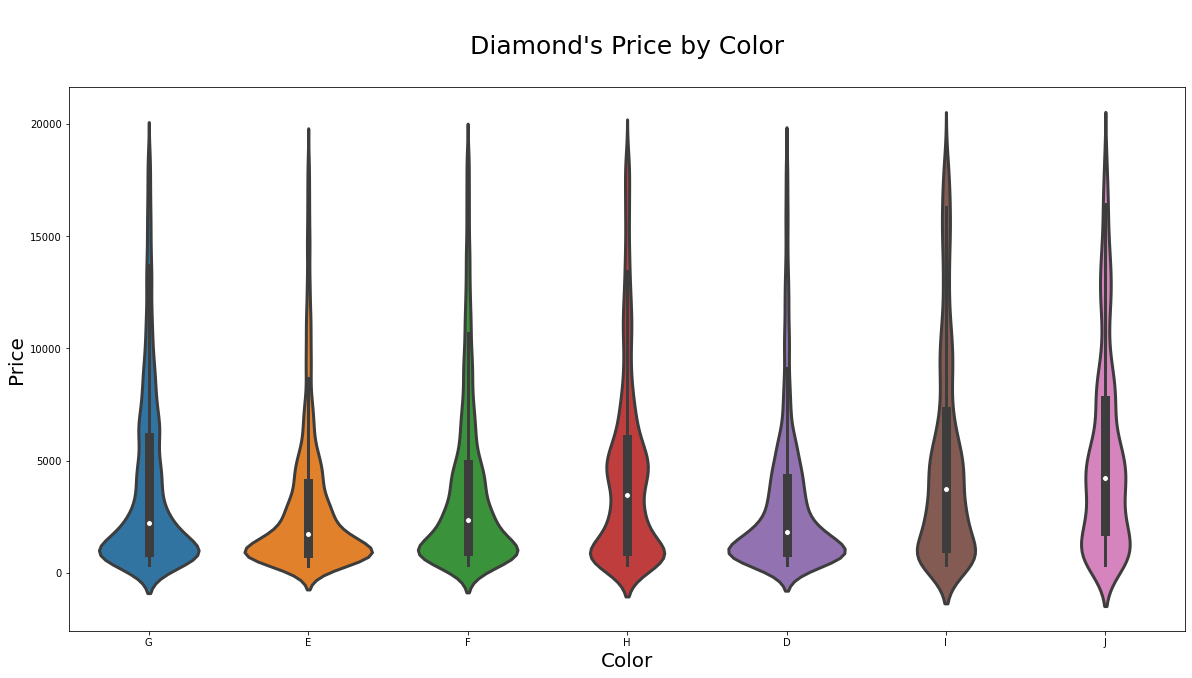

In [39]:
plt.figure(figsize = (20, 10))
p = sns.violinplot(x = "color", y = "price", data = df, order = df["color"].value_counts().index,
                 linewidth = 3, edgecolor = "black")
p.axes.set_title("\nDiamond's Price by Color\n", fontsize = 25)
p.axes.set_xlabel("Color", fontsize = 20)
p.axes.set_ylabel("Price", fontsize = 20)
plt.show()

In [40]:
df.groupby("color").describe()["price"].style.set_properties(**{"background-color" : "#FFF0F5",
                            "border" : "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
D,6775.000000,3169.954096,3356.590935,357.000000,911.000000,1838.000000,4213.500000,18693.000000
E,9797.000000,3076.752475,3344.158685,326.000000,882.000000,1739.000000,4003.000000,18731.000000
F,9542.000000,3724.886397,3784.992007,342.000000,982.000000,2343.500000,4868.250000,18791.000000
G,11292.000000,3999.135671,4051.102846,354.000000,931.000000,2242.000000,6048.000000,18818.000000
H,8304.000000,4486.669196,4215.944171,337.000000,984.000000,3460.000000,5980.250000,18803.000000
I,5422.000000,5091.874954,4722.387604,334.000000,1120.500000,3730.000000,7201.750000,18823.000000
J,2808.000000,5323.818020,4438.187251,335.000000,1860.500000,4234.000000,7695.000000,18710.000000


Below are rough IQR's for price by color:
* **D** diamonds tend to cost around $\$910-\$4250$
* **E** diamonds tend to cost around $\$880-\$4050$
* **F** diamonds tend to cost around $\$980-\$4900$
* **G** diamonds tend to cost around $\$930-\$6050$
* **H** diamonds tend to cost around $\$980-\$6000$
* **I** diamonds tend to cost around $\$1120-\$7250$
* **J** diamonds tend to cost around $\$1860-\$7700$

<a id='7'></a>

# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 25px 25px;"> Diamond's Clarity </p>

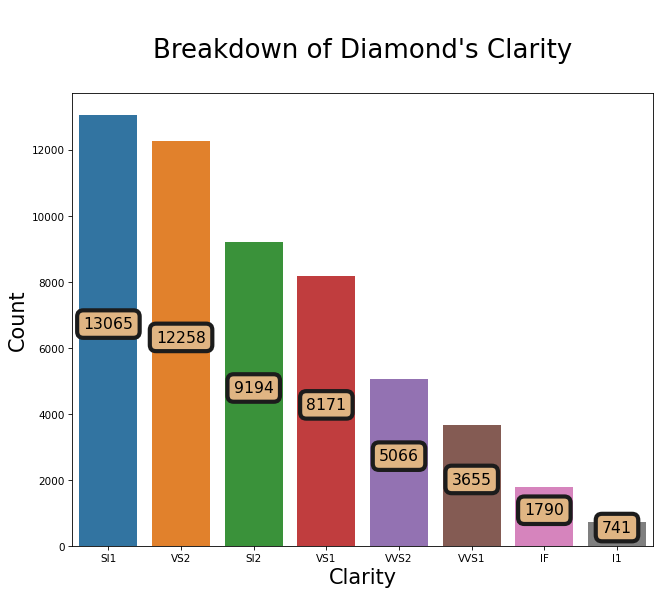

In [41]:

plt.figure(figsize = (10,8), dpi = 75) #create figure
p = sns.countplot(x = "clarity", data = df, order= df["clarity"].value_counts().index) #create countplot
p.axes.set_title("\nBreakdown of Diamond's Clarity\n", fontsize = 25)
p.axes.set_ylabel("Count",fontsize = 20)
p.axes.set_xlabel("Clarity", fontsize = 20) #add x, y, title 

for container in p.containers: #add counts
    p.bar_label(container, label_type = "center", padding = 6, size = 15, color = "black",
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})
plt.show()

The most common clarity category for a diamond is SI1, followed by VS2, SI2. Recall IF is the best clarity, whereas I1 is the worst. We see that the rarest categories are the extremes of clarity (best/worst clarity). 

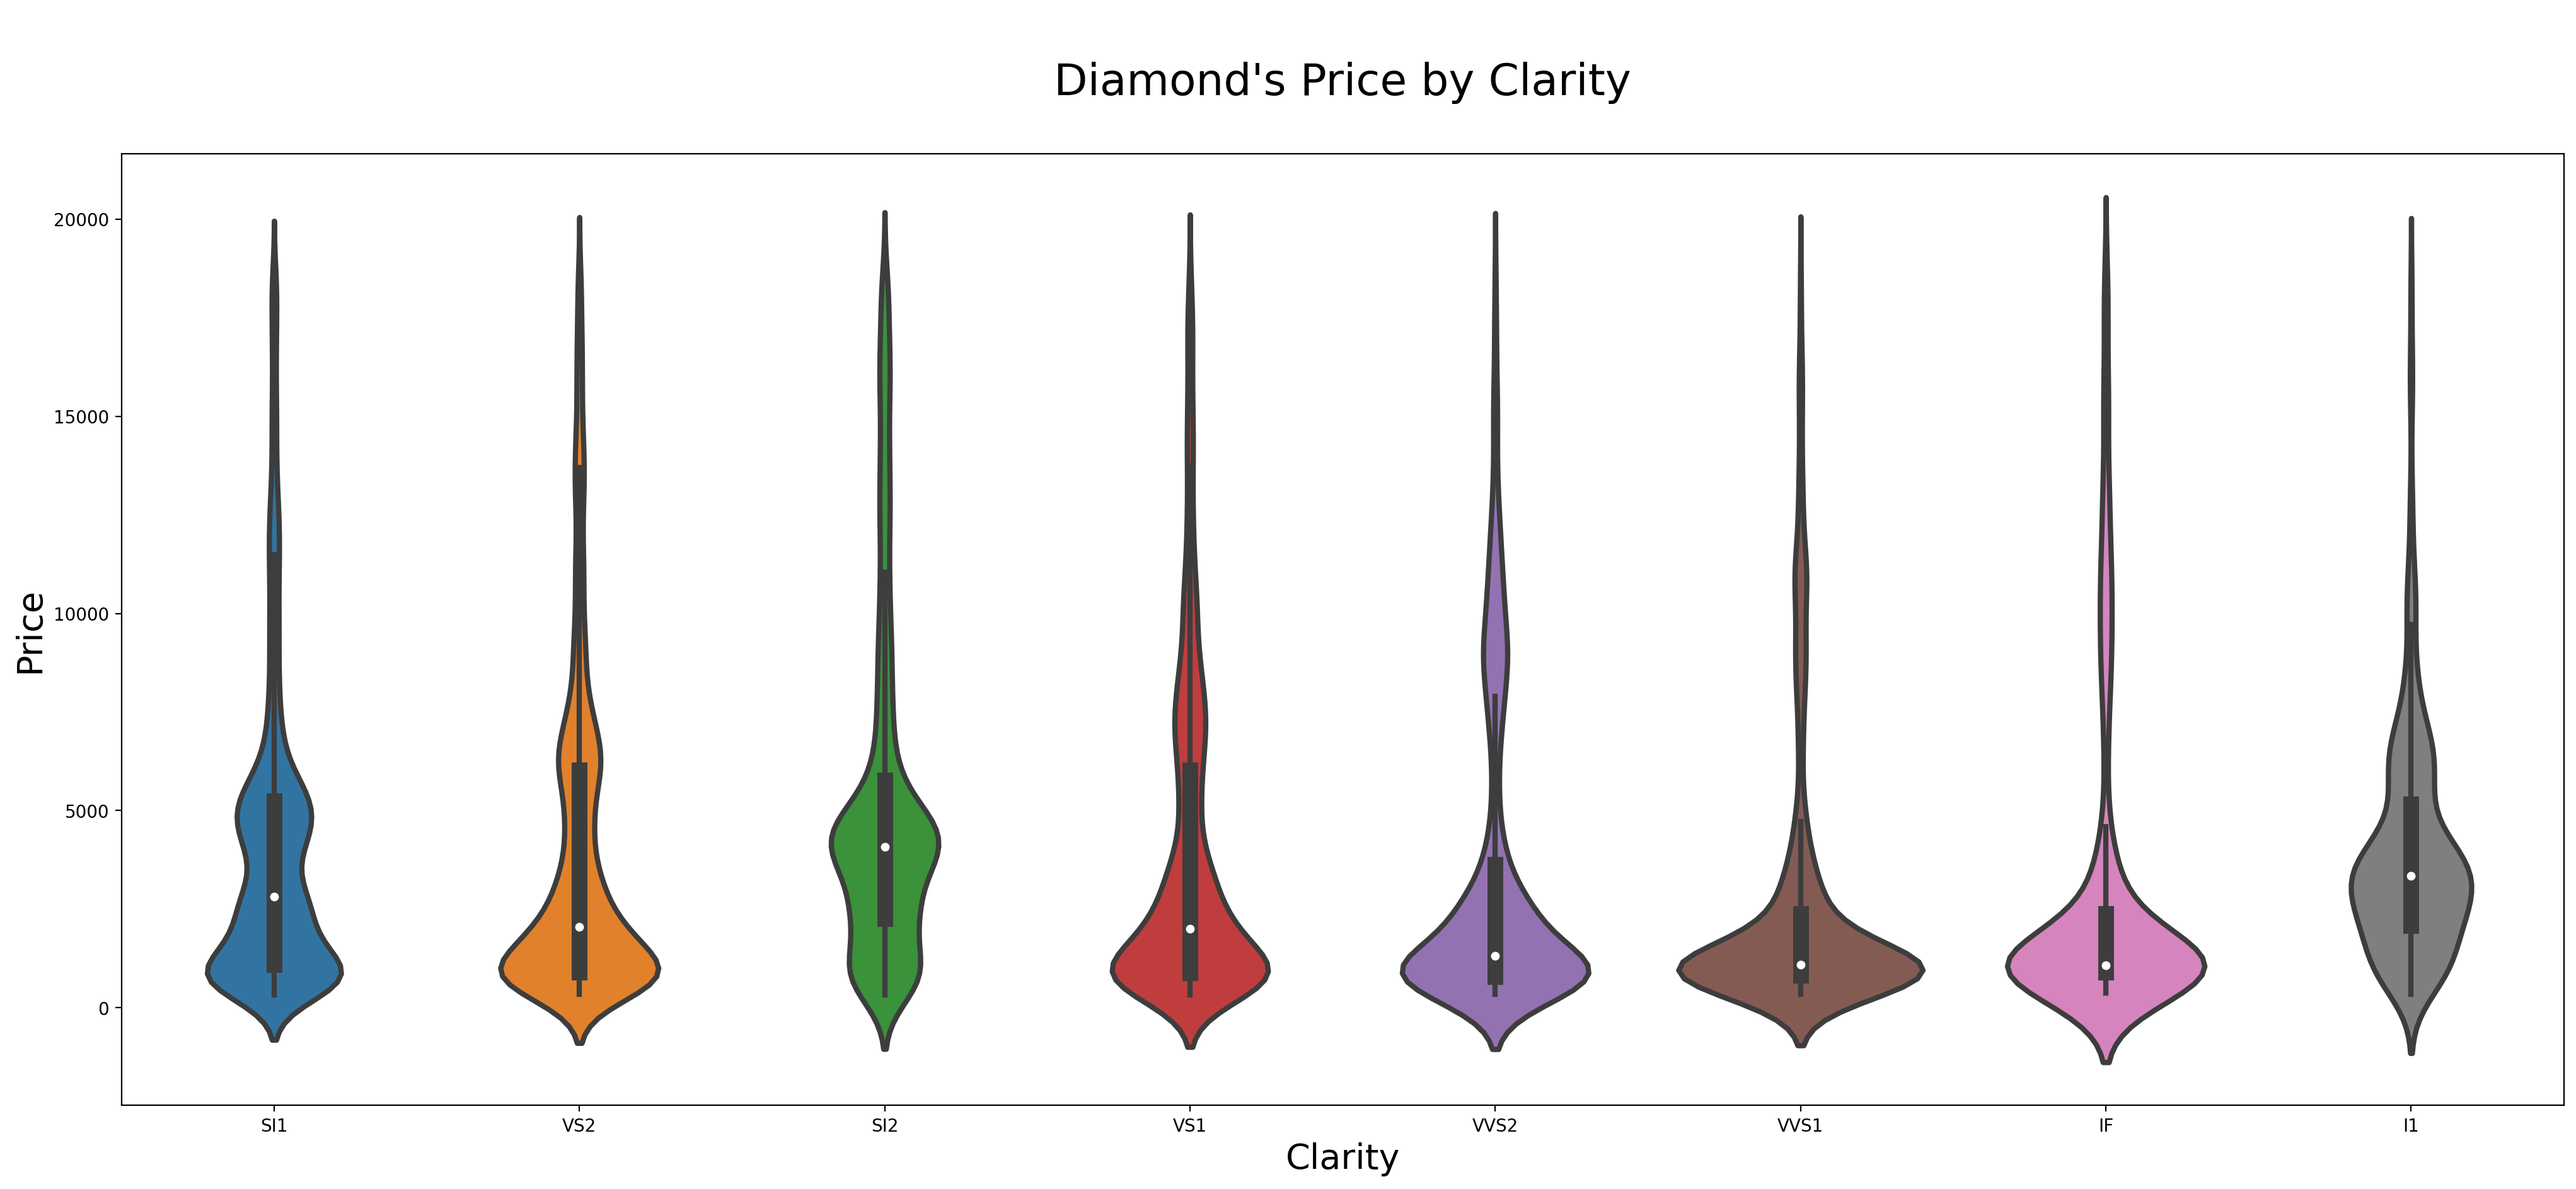

In [42]:
plt.figure(figsize = (25, 10), dpi = 200)
p = sns.violinplot(x = "clarity", y = "price", data = df, order = df["clarity"].value_counts().index,
                 linewidth = 3, edgecolor = "black")
p.axes.set_title("\nDiamond's Price by Clarity\n", fontsize = 25)
p.axes.set_xlabel("Clarity", fontsize = 20)
p.axes.set_ylabel("Price", fontsize = 20)
plt.show()

In [43]:
df.groupby("clarity").describe()["price"].style.set_properties(**{"background-color" : "#FFF0F5",
                            "border" : "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
clarity,,,,,,,,
I1,741.000000,3924.168691,2806.778270,345.000000,2080.000000,3344.000000,5161.000000,18531.000000
IF,1790.000000,2864.839106,3920.248499,369.000000,895.000000,1080.000000,2388.500000,18806.000000
SI1,13065.000000,3996.001148,3799.483853,326.000000,1089.000000,2822.000000,5250.000000,18818.000000
SI2,9194.000000,5063.028606,4260.458578,326.000000,2264.000000,4072.000000,5777.250000,18804.000000
VS1,8171.000000,3839.455391,4011.747958,327.000000,876.000000,2005.000000,6023.000000,18795.000000
VS2,12258.000000,3924.989395,4042.302816,334.000000,900.000000,2054.000000,6023.750000,18823.000000
VVS1,3655.000000,2523.114637,3334.838888,336.000000,816.000000,1093.000000,2379.000000,18777.000000
VVS2,5066.000000,3283.737071,3821.647537,336.000000,794.250000,1311.000000,3638.250000,18768.000000


Below are rough IQR's for price by clarity:
* **IF** diamonds tend to cost around $\$890-\$2400$
* **VVS1** diamonds tend to cost around $\$810-\$2400$
* **VVS2** diamonds tend to cost around $\$790-\$3640$
* **VS1** diamonds tend to cost around $\$870-\$6050$
* **VS2** diamonds tend to cost around $\$900-\$6050$
* **SI1** diamonds tend to cost around $\$1050-\$5250$
* **SI2** diamonds tend to cost around $\$2260-\$5800$
* **I1** diamonds tend to cost around $\$2080-\$5170$

<a id='8'></a>

# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 25px 25px;"> Diamond's Weight (Carat) </p>

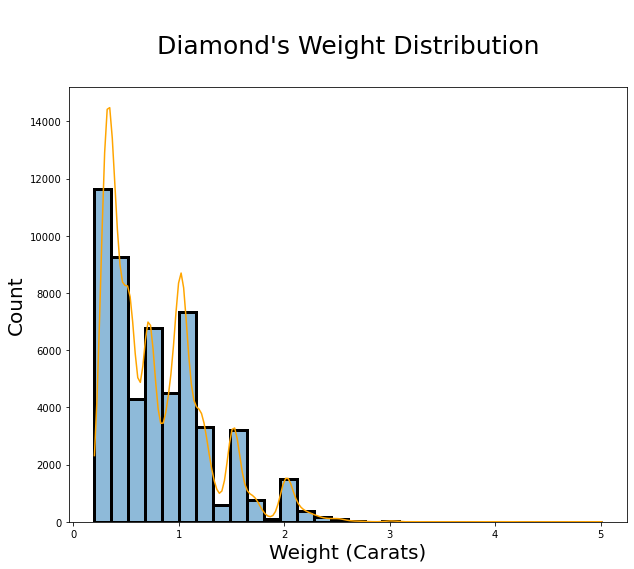

In [44]:
plt.figure(figsize = (10,8))
p = sns.histplot(x = "carat", data = df, bins = 30, kde = True,
                fill = True, edgecolor = "black", linewidth = 3)
p.axes.lines[0].set_color("orange")
p.axes.set_title("\nDiamond's Weight Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Weight (Carats)",fontsize=20)
plt.show()

The data is right skewed; most of the data falls between $.2- 1.2$ carats, but there are extremely heavy diamonds that can get higher. 

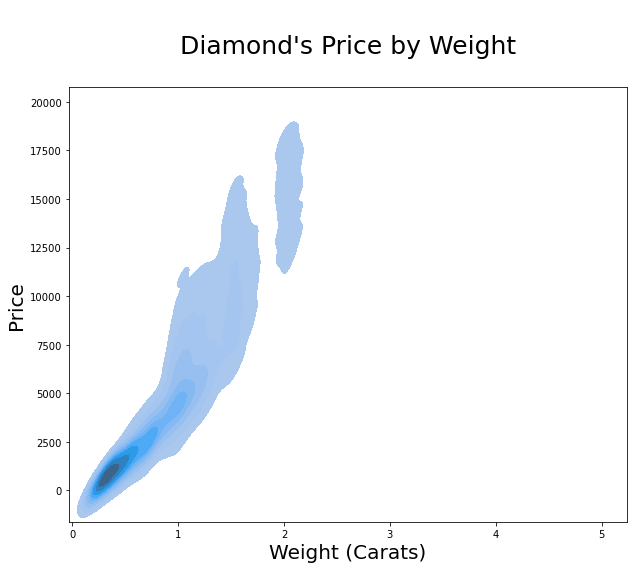

In [45]:
plt.figure(figsize = (10,8))
p = sns.kdeplot(x = "carat", y = "price", data = df, fill = True, kind = "kde", shade = True,
               height = 10)
p.axes.set_title("\nDiamond's Price by Weight\n",fontsize=25)
plt.ylabel("Price",fontsize=20)
plt.xlabel("Weight (Carats)",fontsize=20)
plt.show()

<a id='9'></a>

# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 25px 25px;"> Diamond's Depth Percentage </p>

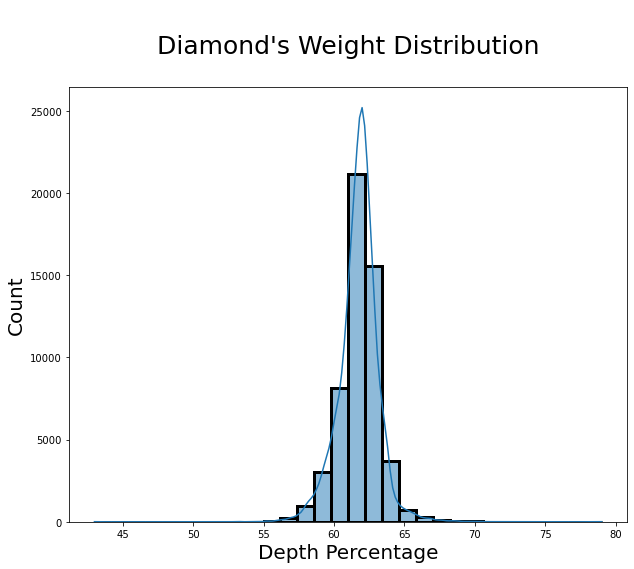

In [46]:
plt.figure(figsize = (10,8))
p = sns.histplot(x = "depth", data = df, bins = 30, kde = True,
                fill = True, edgecolor = "black", linewidth = 3)
p.axes.set_title("\nDiamond's Weight Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Depth Percentage",fontsize=20)
plt.show()

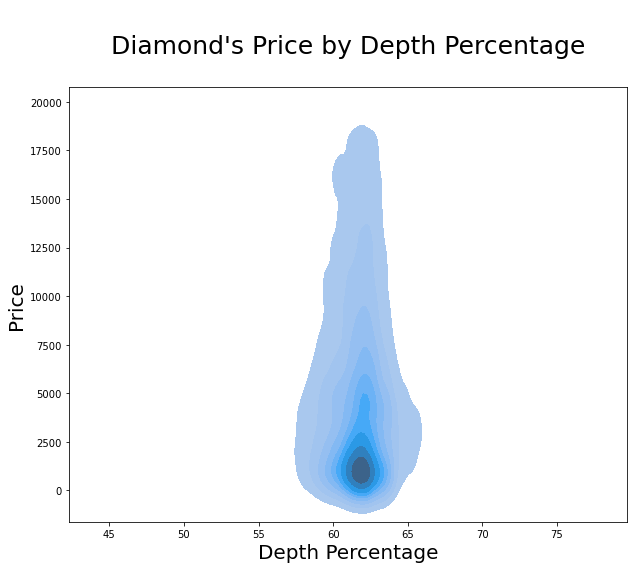

In [27]:
plt.figure(figsize = (10,8))
p = sns.kdeplot(x = "depth", y = "price", data = df, fill = True, kind = "kde", shade = True,
               height = 10)
p.axes.set_title("\nDiamond's Price by Depth Percentage\n",fontsize=25)
plt.ylabel("Price",fontsize=20)
plt.xlabel("Depth Percentage",fontsize=20)
plt.show()

As we can see, depth percentage follows a somewhat normal distribution, with the mean being around $62\%$. 

<a id='10'></a>

# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 25px 25px;"> Diamond's Table </p>

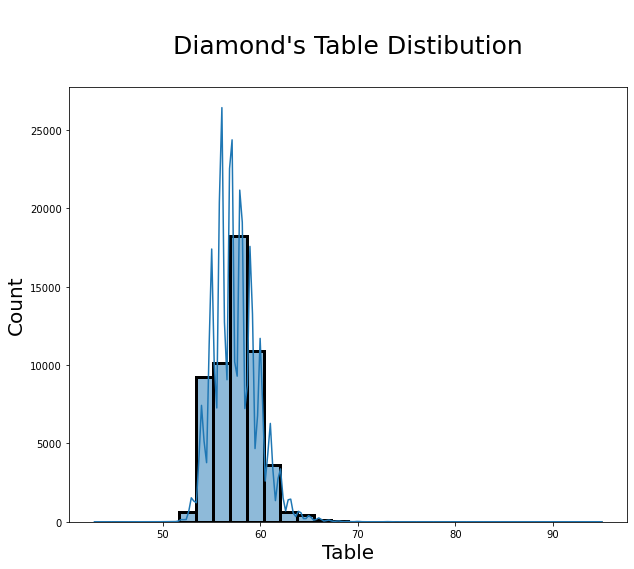

In [47]:
plt.figure(figsize = (10,8))
p = sns.histplot(x = "table", data = df, bins = 30, kde = True,
                fill = True, edgecolor = "black", linewidth = 3)
p.axes.set_title("\nDiamond's Table Distibution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Table",fontsize=20)
plt.show()

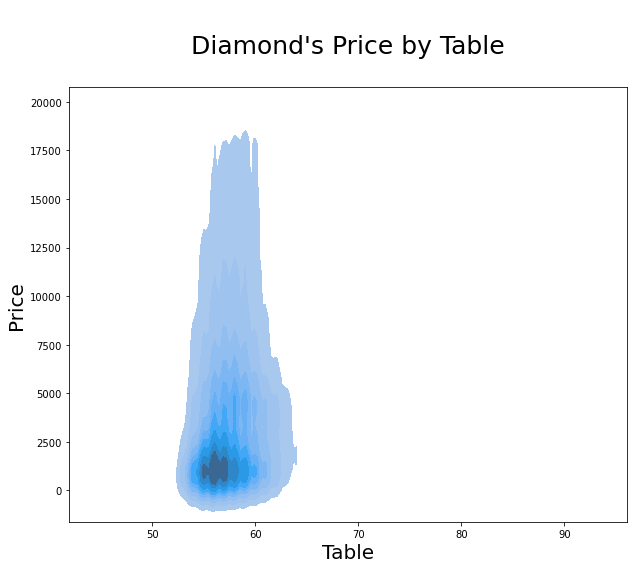

In [54]:
plt.figure(figsize = (10,8))
p = sns.kdeplot(x = "table", y = "price", data = df, fill = True, kind = "kde", shade = True,
               height = 10)
p.axes.set_title("\nDiamond's Price by Table\n",fontsize=25)
plt.ylabel("Price",fontsize=20)
plt.xlabel("Table",fontsize=20)
plt.show()

The table of most diamonds is around $58\%$; the distribution of table is also unimodal, though likely not exactly normal.

<a id='11'></a>

# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 25px 25px;"> Detecting Outliers </p>

<Figure size 1440x576 with 0 Axes>

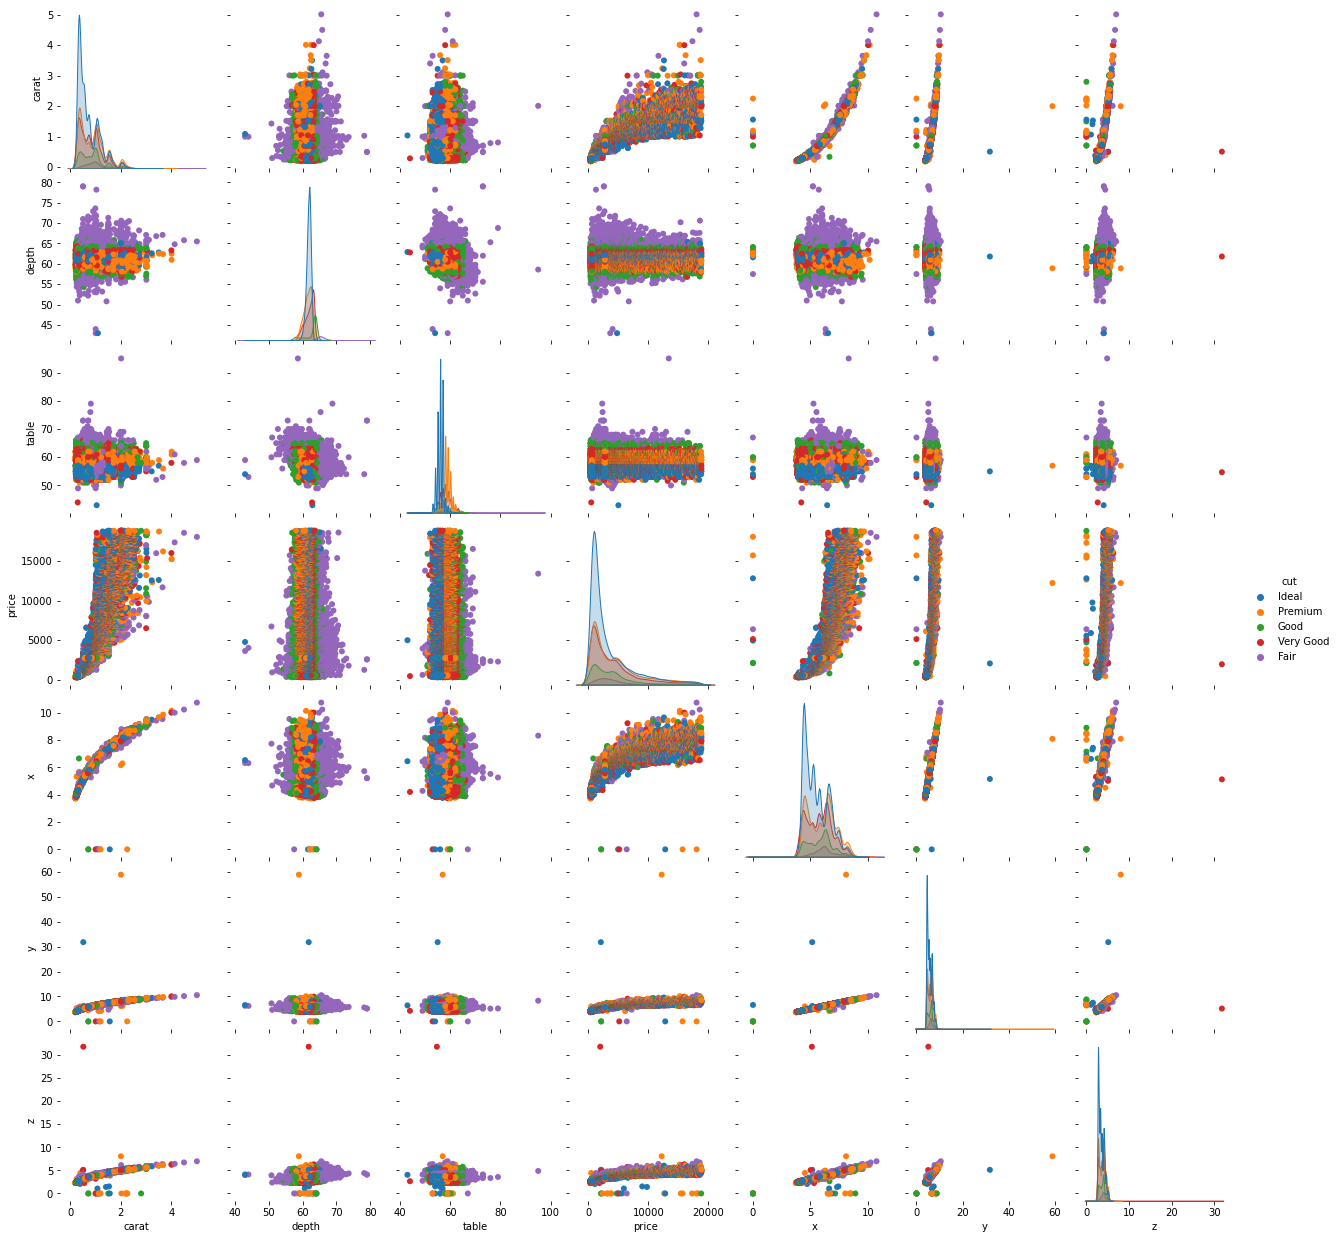

In [48]:
plt.figure(figsize = (20,8))
sns.pairplot(data = df,hue="cut", plot_kws=dict(linewidth=0))
sns.despine(left=True, bottom=True)
plt.show()

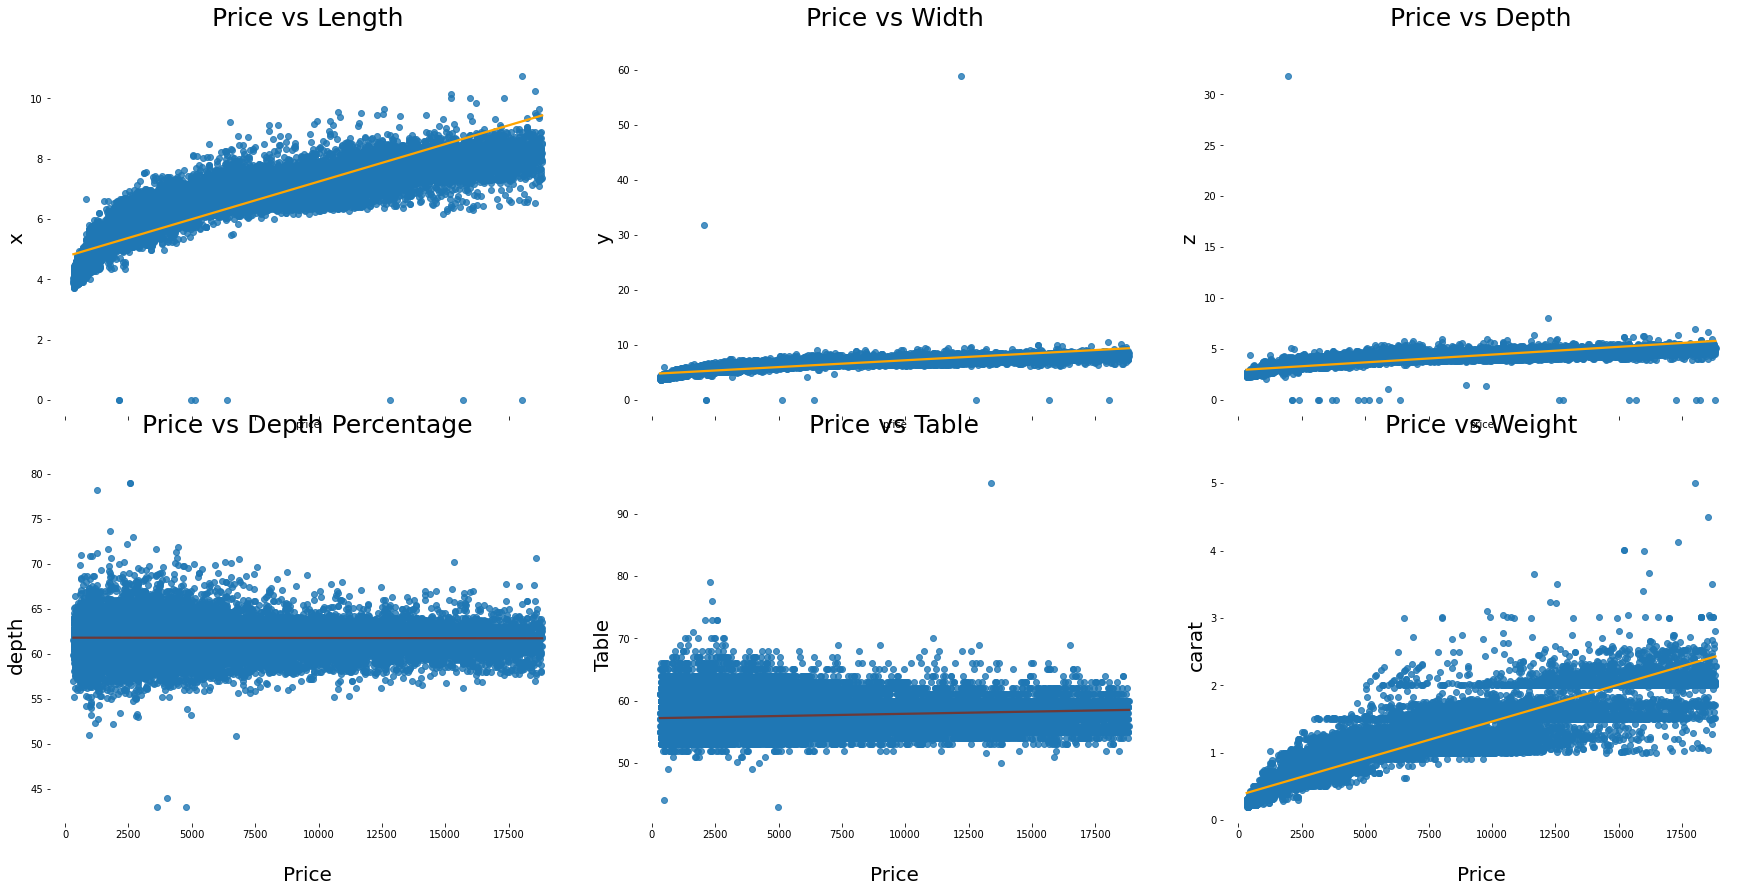

In [49]:
_, axs = plt.subplots(2,3,figsize=(25,12),sharex=True)
plt.tight_layout(pad=4.0)

sns.regplot(x="price", y="x", data=df, ax=axs[0,0], fit_reg=True, line_kws=dict(color= "orange"))
axs[0,0].set_title("Price vs Length\n",fontsize=25)
axs[0,0].set_ylabel("x",fontsize=20)

sns.regplot(x="price", y="y", data=df, ax=axs[0,1], fit_reg=True, line_kws=dict(color= "orange"))
axs[0,1].set_title("Price vs Width\n",fontsize=25)
axs[0,1].set_ylabel("y",fontsize=20)

sns.regplot(x="price", y="z", data=df, ax=axs[0,2], fit_reg=True, line_kws=dict(color= "orange"))
axs[0,2].set_title("Price vs Depth\n",fontsize=25)
axs[0,2].set_ylabel("z",fontsize=20)

sns.regplot(x="price", y="depth", data=df, ax=axs[1,0], fit_reg=True, line_kws=dict(color= "#6c3938"))
axs[1,0].set_title("Price vs Depth Percentage\n",fontsize=25)
axs[1,0].set_xlabel("\nPrice",fontsize=20)
axs[1,0].set_ylabel("depth",fontsize=20)

sns.regplot(x="price", y="table", data=df, ax=axs[1,1], fit_reg=True, line_kws=dict(color= "#6c3938"))
axs[1,1].set_title("Price vs Table\n",fontsize=25)
axs[1,1].set_xlabel("\nPrice",fontsize=20)
axs[1,1].set_ylabel("Table",fontsize=20)

sns.regplot(x="price", y="carat", data=df, ax=axs[1,2], fit_reg=True, line_kws=dict(color= "orange"))
axs[1,2].set_title("Price vs Weight\n",fontsize=25)
axs[1,2].set_xlabel("\nPrice",fontsize=20)
axs[1,2].set_ylabel("carat",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

We can see some outliers, which we will now remove. 

<Figure size 1440x576 with 0 Axes>

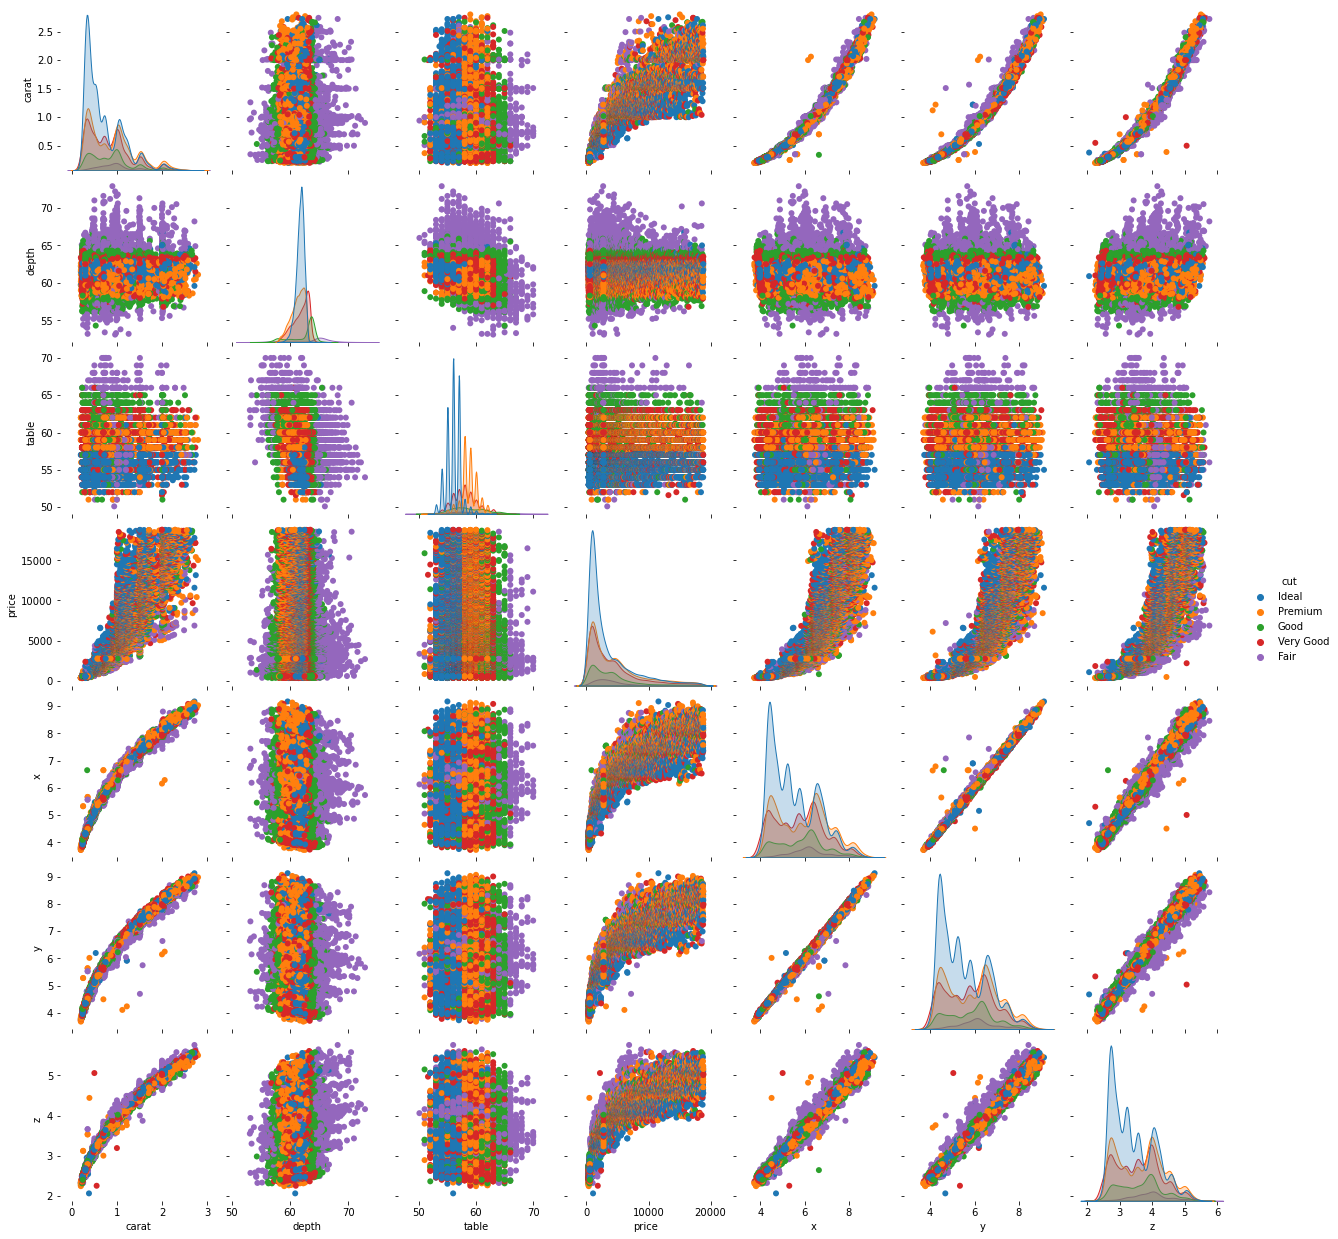

In [50]:
df = df[(df["x"] < 10) & (df["x"] > 3)]
df = df[(df["y"] < 13) & (df["y"] > 2)]
df = df[(df["z"] < 6) & (df["z"] > 2)]
df = df[(df["depth"] < 73 ) & (df["depth"] > 53)]
df = df[(df["table"] < 71) & (df["table"] > 50)]
df = df[(df["carat"] < 3)]

plt.figure(figsize = (20,8))
sns.pairplot(data = df,hue="cut", plot_kws=dict(linewidth=0))
sns.despine(left=True, bottom=True)
plt.show()

<a id='12'></a>

# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 25px 25px;"> Correlation Map </p>

In [51]:
categoricals = ["color", "clarity", "cut"]
for col in categoricals:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

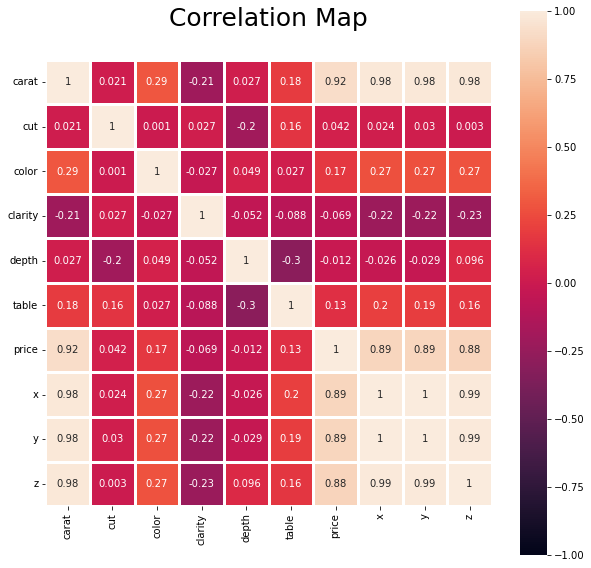

In [52]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), square = True, annot = True,
           vmin = -1, vmax = 1, linewidths = 3)
plt.title("Correlation Map\n", fontsize = 25)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

Notice there is a high correlation between price and carat (.92), along with $x,y,z$. Carat has a high correlation with $x,y,z$. Each of $x,y,z$ are extremely correlation with one another.

<a id='13'></a>

# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 25px 25px;"> Model Creation</p>

We now split the data into features/labels. We also perform a train test split with a test size of $.2$. After this we scale the data based on the training set (to avoid data leakage) and then transform both X train/X test.  

In [7]:
X = df.drop("price", axis = 1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [16]:
models = [ElasticNet(max_iter = 10000),
          KNeighborsRegressor(),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          AdaBoostRegressor()]
 
grids = [{"l1_ratio" : [0,.1,.5,.9,1], "alpha" : [0, 1, 3, 10]},
         {"n_neighbors" : [5, 10, 25, 40]},
         {"n_estimators" : [50, 100, 200], "bootstrap" : [True, False], 
         "oob_score" : [True, False]},
         {"n_estimators" : [50, 100, 200], "max_depth" : [2,3,4],
         "learning_rate" : [.05, .1, .2]},
         {"n_estimators" : [25, 50, 100], "learning_rate" : [.5, 1, 2]}]

names = ["Elastic Net", "K-Nearest Neighbors", "Random Forest", 
         "Gradient Boosting", "Ada Boosting"]

We create a few different regression models to test. After some initial trials, we elected not to include a support vector regression, since it didn't perform well. Notice that linear regression is implicitly checked, as it is the special case of elastic net where the alpha parameter for elastic net is $0$ (i.e. no regularization penalty is added). 

In [17]:
final_models = []

for i in range(5):
    model = models[i]
    param_grid = grids[i]
    name = names[i]
    
    #Grid Search Hyperparameters
    grid = GridSearchCV(model, param_grid)
    grid.fit(scaled_X_train, y_train)
    predictions = grid.predict(scaled_X_test)
    final_models.append(grid)
    
    #Get Regression Metrics 
    MAE = metrics.mean_absolute_error(y_test, predictions)
    MSE = metrics.mean_squared_error(y_test, predictions)
    RMSE = np.sqrt(MSE)
    R2 = metrics.r2_score(y_test, predictions)
    
    #Print Findings
    print(name + " Regression:\n")
    print("Cross Validated Parameters:")
    print(grid.best_params_)
    print(f"R Squared Value: {R2}")
    print(f"Mean Absolute Error: {MAE}")
    print(f"Mean Squared Error: {MSE}")
    print(f"Root Mean Squared Error: {RMSE}\n")

Elastic Net Regression:

Cross Validated Parameters:
{'alpha': 0, 'l1_ratio': 0}
R Squared Value: 0.8878134060280665
Mean Absolute Error: 848.5524306900412
Mean Squared Error: 1778070.7549054606
Root Mean Squared Error: 1333.4431952301009

K-Nearest Neighbors Regression:

Cross Validated Parameters:
{'n_neighbors': 5}
R Squared Value: 0.9592259460937232
Mean Absolute Error: 406.66508820798515
Mean Squared Error: 646237.2217827297
Root Mean Squared Error: 803.8888118283086

Random Forest Regression:

Cross Validated Parameters:
{'bootstrap': True, 'n_estimators': 200, 'oob_score': False}
R Squared Value: 0.9819411626880542
Mean Absolute Error: 265.0912891528865
Mean Squared Error: 286218.6055849015
Root Mean Squared Error: 534.9940238777453

Gradient Boosting Regression:

Cross Validated Parameters:
{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
R Squared Value: 0.9820846731359774
Mean Absolute Error: 282.37663518221206
Mean Squared Error: 283944.0759691847
Root Mean Square

Notice that the best parameters for **Elastic Net** happened to be $\alpha = 0$, implying that linear regression performed better without any regularization penalty. **K-Nearest Neighbors** performed well and only used $5$ neighbors. **Random Forest Regression** performed even better. The oob score doesn't impact the regression, so it really doesn't matter whether one computes it or not. Further, we never tested any more estimators than $200$, so it may be worthwhile to try with even more neighbors (I won't do this now just to avoid such a heavy computational task). **Gradient Boosting Regression** also ended up using lots of estimators, and it perfromed slightly better than RFR. Finally, **Ada Boosting Regression** used only $25$ estimators, but it wasn't as successful as the other ensemble/tree based methods. <br>

Overall, the best model based on $R^2$ and $RMSE$ was **Gradient Boosting Regression** with a learning rate of $.2$, a max depth of $4$, and $200$ estimators. We can now fit a final model using all of the data.

<a id='14'></a>

# <p style ="padding: 10px; background-color: #1E90FF; color : #F8F8FF; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius : 25px 25px;"> Final Model </p>

In [53]:
#Scale Data
final_scaler = StandardScaler()
scaled_X = final_scaler.fit_transform(X)

#Get Final Model
final_model = GradientBoostingRegressor(learning_rate = .2, n_estimators = 200,
                                        max_depth = 4)
final_model.fit(scaled_X, y)

GradientBoostingRegressor(learning_rate=0.2, max_depth=4, n_estimators=200)

Our final model utilizes gradient boosted regression. Despite the fact that our regression metrics are very high, there is the possibility of further optimizing. One specific example is linear regression. Typically, one should ensure the model assumptions are met; specificially the data was independent (assumed true), linearity (the relationship is actually linear), and the errors are normally distributed with mean zero. However, if we actually did any sort of diagnostics (residual plots), we would see this is not the case for our dataset. One can see this even in the plot of carat vs. price- carat is a very important feature, yet this relationship is clearly not linear. We really should have tried different methods (box-cox/tukey's circle) to determine optimal transformations before using linear regression. When I analyzed this same dataset in R for a stat project, my group and I achieved $R^2 = .983$ (higher than here!) with just linear regression and only using carat, clarity, cut, and color. Our final model there was $$\widehat{\log{\mathrm{Price}}} = \log{\mathrm{Carat}} + \text{ Color, Cut, Clarity Indicator Variables.}$$ The fact that such a simple model can arguably acheive better metrics means in the future it's worthwhile to spend time optimizing each specific regression, really taking into account how each regression actually works.